In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import pywt

In [2]:
img = cv2.imread('./test_images/Eminem11.jpg')
img.shape

(300, 450, 3)

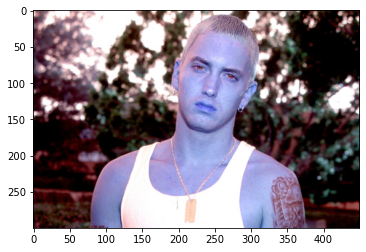

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(300, 450)

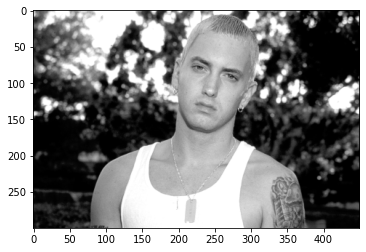

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.5, 5)
faces

array([[189,  37, 122, 122]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(189, 37, 122, 122)

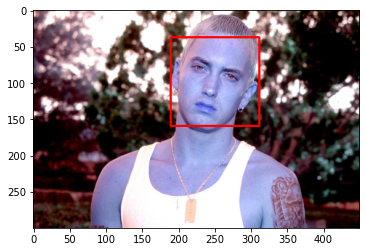

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

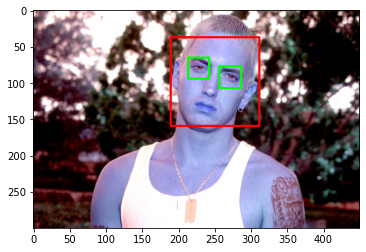

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

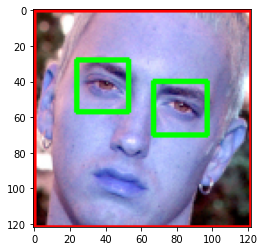

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.5, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

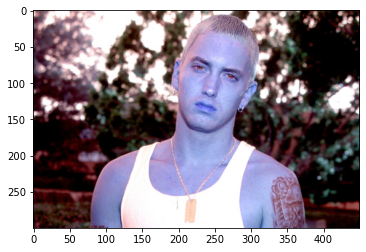

In [12]:
origional_image = cv2.imread('./test_images/Eminem11.jpg')
plt.imshow(origional_image)

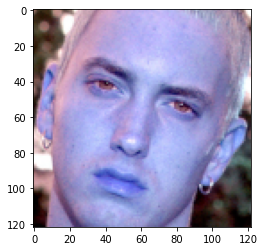

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Eminem11.jpg')
plt.imshow(cropped_image)

In [23]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [24]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [25]:
img_dirs.remove('./dataset/.ipynb_checkpoints')
img_dirs

['./dataset/50_cent',
 './dataset/drake',
 './dataset/dre',
 './dataset/eminem',
 './dataset/tupac']

In [26]:
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [27]:
cropped_image_dirs = []
artist_file_names_dict = {}

for img_dir  in img_dirs:
    count = 1
    artist_name = img_dir.split('/')[-1]
    print(artist_name)
    
    artist_file_names_dict[artist_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + artist_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = artist_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color) 
            artist_file_names_dict[artist_name].append(cropped_file_path)
            count += 1
            

50_cent
Generating cropped images in folder:  ./dataset/cropped/50_cent
drake
Generating cropped images in folder:  ./dataset/cropped/drake
dre
Generating cropped images in folder:  ./dataset/cropped/dre
eminem
Generating cropped images in folder:  ./dataset/cropped/eminem
tupac
Generating cropped images in folder:  ./dataset/cropped/tupac


In [28]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

## Feature Engineering

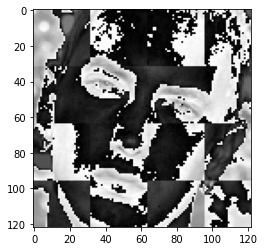

In [33]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [47]:
artist_file_names_dict = {}
for img_dir in cropped_image_dirs:
    artist_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    artist_file_names_dict[artist_name] = file_list
artist_file_names_dict

{'50_cent': ['./dataset/cropped/50_cent\\50_cent1.png',
  './dataset/cropped/50_cent\\50_cent10.png',
  './dataset/cropped/50_cent\\50_cent11.png',
  './dataset/cropped/50_cent\\50_cent12.png',
  './dataset/cropped/50_cent\\50_cent14.png',
  './dataset/cropped/50_cent\\50_cent15.png',
  './dataset/cropped/50_cent\\50_cent17.png',
  './dataset/cropped/50_cent\\50_cent18.png',
  './dataset/cropped/50_cent\\50_cent19.png',
  './dataset/cropped/50_cent\\50_cent2.png',
  './dataset/cropped/50_cent\\50_cent20.png',
  './dataset/cropped/50_cent\\50_cent21.png',
  './dataset/cropped/50_cent\\50_cent22.png',
  './dataset/cropped/50_cent\\50_cent23.png',
  './dataset/cropped/50_cent\\50_cent24.png',
  './dataset/cropped/50_cent\\50_cent25.png',
  './dataset/cropped/50_cent\\50_cent26.png',
  './dataset/cropped/50_cent\\50_cent27.png',
  './dataset/cropped/50_cent\\50_cent28.png',
  './dataset/cropped/50_cent\\50_cent29.png',
  './dataset/cropped/50_cent\\50_cent3.png',
  './dataset/cropped/50_ce

In [48]:
class_dict = {}
count = 0
for artist_name in artist_file_names_dict.keys():
    class_dict[artist_name] = count
    count = count + 1
class_dict

{'50_cent': 0, 'drake': 1, 'dre': 2, 'eminem': 3, 'tupac': 4}

In [49]:
X = []
y = []

for artist_name, training_files in artist_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[artist_name])

In [50]:
len(X)

177

In [51]:
len(X[0])

4096

In [52]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(177, 4096)

## Model Training

In [74]:
# Importing modeling Libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9333333333333333

In [58]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.86      1.00      0.92        12
           2       0.94      1.00      0.97        16
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         3

    accuracy                           0.93        45
   macro avg       0.96      0.91      0.93        45
weighted avg       0.94      0.93      0.93        45



In [60]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [67]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.743875,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.643590,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.689744,{'logisticregression__C': 1}


In [68]:
best_estimators['svm'].score(X_test,y_test)

0.8888888888888888

In [69]:
best_estimators['random_forest'].score(X_test,y_test)

0.8

In [70]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8

In [71]:
best_clf = best_estimators['svm']

In [73]:
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  1,  1,  0,  0],
       [ 0, 12,  0,  0,  0],
       [ 1,  0, 14,  1,  0],
       [ 0,  1,  0,  3,  0],
       [ 0,  0,  0,  0,  3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

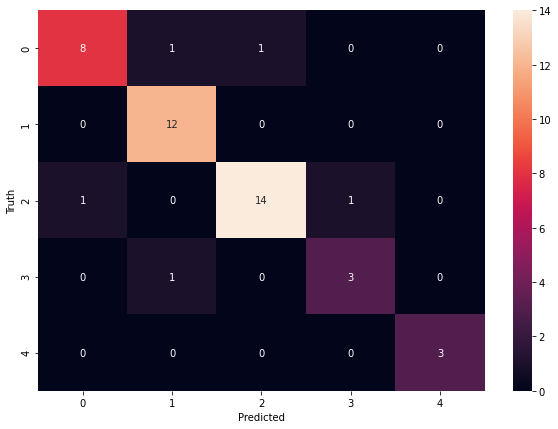

In [75]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
class_dict

{'50_cent': 0, 'drake': 1, 'dre': 2, 'eminem': 3, 'tupac': 4}

## Saving the model

In [80]:
import pickle
import json

In [81]:
pickle.dump(best_clf, open('best_model.pkl', 'wb'))

In [82]:
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))